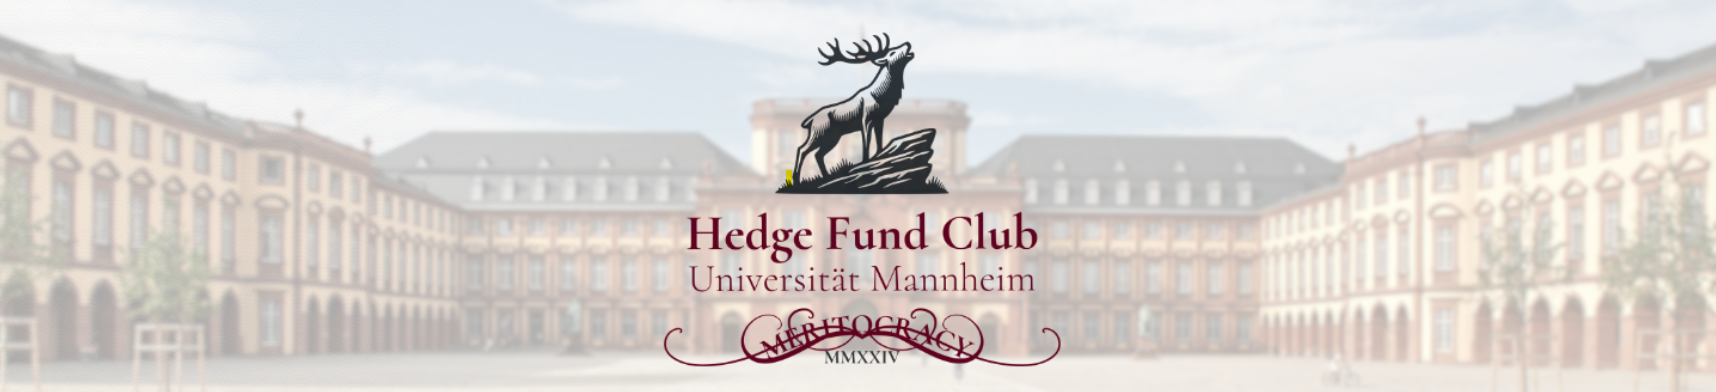

# Confidential and Proprietary Information

© 2024 **Hedge Fund Club e.V.** All rights reserved.

This document contains confidential and proprietary information intended solely for the members of **Hedge Fund Club e.V.** Unauthorized copying, distribution or disclosure of any content from this file to third parties is strictly prohibited without prior written consent. If you are not a member and wish to access or share any part of this document, please contact us to obtain permission.


<span style="font-size:2.2em; font-weight:bold; color:#2E86C1;">Session 8: Options in practice</span>

<span style="font-weight:bold;">In this session, we will explore the practical application of options strategies in Python. Step by step, we will implement various concepts to develop a comprehensive understanding of options trading and risk management.</span>

<span style="color:#E74C3C; font-weight:bold;">1.</span> We will begin by calculating option prices using the Black-Scholes model, which we have previously been introduced to in Excel.

<span style="color:#E74C3C; font-weight:bold;">2.</span> Next, we will simulate payoff diagrams to visually represent the potential profits and losses of different options strategies.

<span style="color:#E74C3C; font-weight:bold;">3.</span> We will then implement a trend-following strategy using options overlays to see how derivatives can be used to capitalize on market momentum.

<span style="color:#E74C3C; font-weight:bold;">4.</span> Finally, we will analyze the risk and return profile of our strategy to evaluate its real-world viability.

---



<span style="font-size:2.2em; font-weight:bold; color:#2E86C1;">1. Black-Scholes model</span>  

Call Option Price: €4.18
Put Option Price: €7.62

Generating Call Option Price Sensitivity Plot...


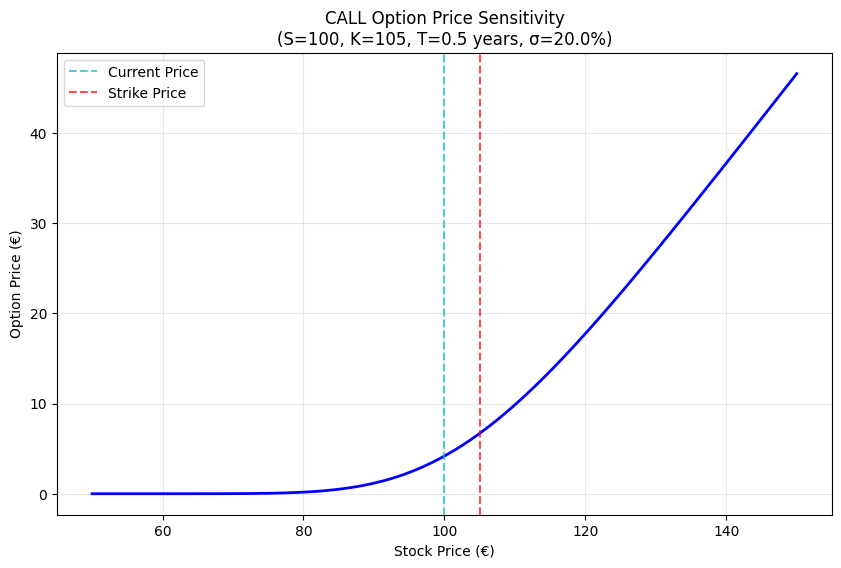

Generating Put Option Price Sensitivity Plot...


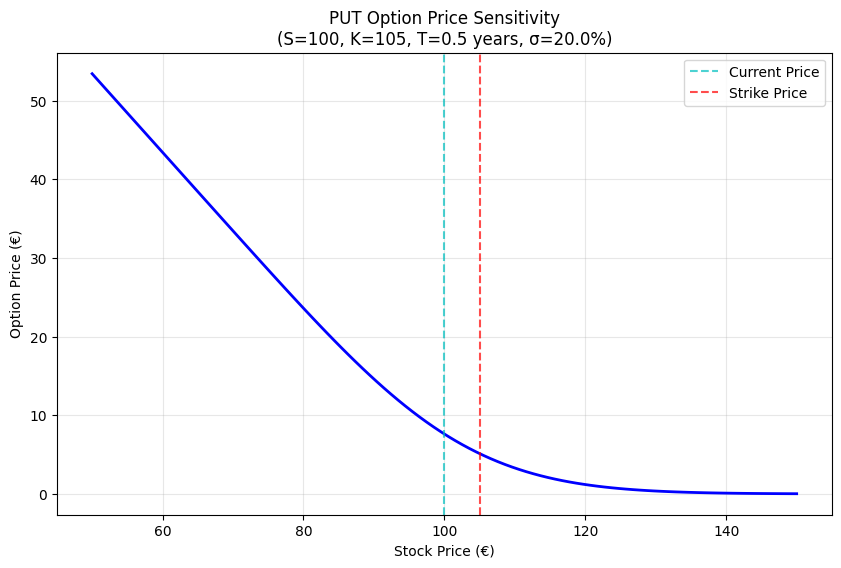

In [3]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def black_scholes(S, K, T, r, sigma, option_type):
    """
    Calculates the Black-Scholes option price for European call or put options.

    Parameters:
    ----------
    S : float
        Current stock (underlying asset) price
    K : float
        Strike (exercise) price
    T : float
        Time to expiration (in years)
    r : float
        Risk-free interest rate (as a decimal, e.g., 0.03 for 3%)
    sigma : float
        Volatility of the underlying asset (as a decimal, e.g., 0.2 for 20%)
    option_type : str
        Either 'call' or 'put'
    """

    # Calculate d1 and d2, which are intermediate terms in the Black-Scholes formula
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    # Depending on the option type, compute the price
    if option_type == 'call':
        # Call option formula: S*N(d1) - K*exp(-rT)*N(d2)
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        # Put option formula: K*exp(-rT)*N(-d2) - S*N(-d1)
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        # Raise an error if an invalid option type is provided
        raise ValueError("Option type must be 'call' or 'put'")

    return price


def plot_option_price_sensitivity(S, K, T, r, sigma, option_type):
    """
    Plot how the option price changes as the underlying stock price changes.
    This gives a sensitivity curve of the option price vs stock price.

    Parameters are the same as in black_scholes().
    """

    # Generate a range of stock prices (from 50% to 150% of current price)
    stock_prices = np.linspace(S * 0.5, S * 1.5, 100)

    # Compute the option price for each stock price in the range
    option_prices = [black_scholes(price, K, T, r, sigma, option_type) 
                     for price in stock_prices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, option_prices, 'b-', linewidth=2)

    # Add vertical lines for current stock price and strike price
    plt.axvline(x=S, color='c', linestyle='--', alpha=0.7, label='Current Price')
    plt.axvline(x=K, color='r', linestyle='--', alpha=0.7, label='Strike Price')

    # Labels and title
    plt.xlabel('Stock Price (€)')
    plt.ylabel('Option Price (€)')
    plt.title(f'{option_type.upper()} Option Price Sensitivity\n'
              f'(S={S}, K={K}, T={T} years, σ={sigma*100}%)')

    # Add legend and grid for clarity
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


# Example usage
if __name__ == "__main__":
    # Parameters for the option
    S = 100      # Stock price: €100
    K = 105      # Strike price: €105
    T = 0.5      # Time to expiration: 0.5 years (6 months)
    r = 0.03     # Risk-free interest rate: 3%
    sigma = 0.2  # Volatility: 20%

    # Calculate and display call option price
    call_price = black_scholes(S, K, T, r, sigma, 'call')
    print(f"Call Option Price: €{call_price:.2f}")

    # Calculate and display put option price
    put_price = black_scholes(S, K, T, r, sigma, 'put')
    print(f"Put Option Price: €{put_price:.2f}")

    # Generate and display sensitivity plots
    print("\nGenerating Call Option Price Sensitivity Plot...")
    plot_option_price_sensitivity(S, K, T, r, sigma, 'call')

    print("Generating Put Option Price Sensitivity Plot...")
    plot_option_price_sensitivity(S, K, T, r, sigma, 'put')


---

<span style="font-size:2.2em; font-weight:bold; color:#2E86C1;">2. Payoff Diagrams</span>

Understanding Option Strategy Profitability

A payoff diagram is a graphical representation that shows the potential profit or loss of an options strategy at expiration for different underlying asset prices. It visually demonstrates how the strategy performs under various market scenarios, making complex strategies easier to understand and analyze.

Payoff diagrams are essential tools for options traders because they transform mathematical profit calculations into intuitive visual patterns. They help traders quickly assess risk-reward profiles, identify breakeven points, and understand the maximum potential gains and losses before entering a position.

<span style="color:#E74C3C;font-weight:bold;">Key Components:</span>  
The diagram typically shows the underlying asset price on the x-axis and the profit/loss on the y-axis. Different strategies create distinct patterns - from simple straight lines for basic calls and puts to complex shapes for multi-leg strategies like spreads, straddles, and butterflies.

<span style="color:#E74C3C;font-weight:bold;">In this section we will create payoff diagrams for various options strategies to visualize their risk-reward characteristics and understand their behavior at expiration.</span>

---

<span style="font-size:1.5em; font-weight:bold; color:#27AE60;">Straddle Strategy</span>  

A **straddle** is an options strategy that involves buying a call option and a put option with the **same strike price and expiration date**.  

- **Long Straddle:** The trader buys both the call and the put. This strategy profits from **large price movements in either direction**. If the underlying moves significantly up, the call generates gains; if it drops, the put becomes profitable.  
- **Risk-Reward Profile:**  
  - **Maximum Loss:** Limited to the total premium paid for both options (if the underlying stays exactly at the strike price at expiration).  
  - **Maximum Profit:** Unlimited to the upside (due to the call) and substantial to the downside (due to the put, limited only by the asset not going below zero).  
  - **Breakeven Points:** Strike price ± total premium paid.  

This makes the long straddle a popular strategy when traders expect **high volatility** but are uncertain about the direction of the move.


SINGLE OPTION PAYOFF DIAGRAMS

1. Long Call Option:
   Strike: $105, Premium: $4.18


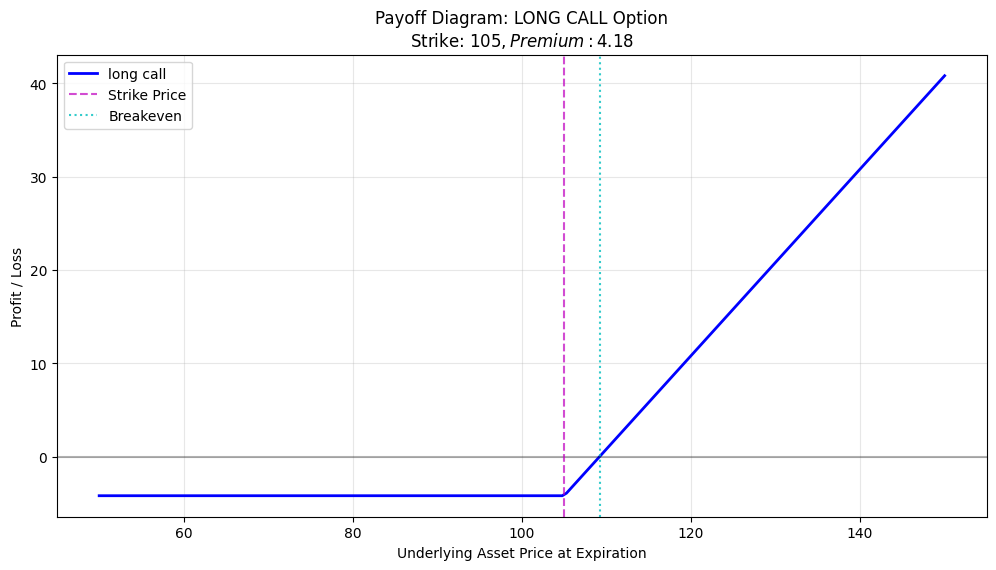


2. Long Put Option:
   Strike: $95, Premium: $2.84


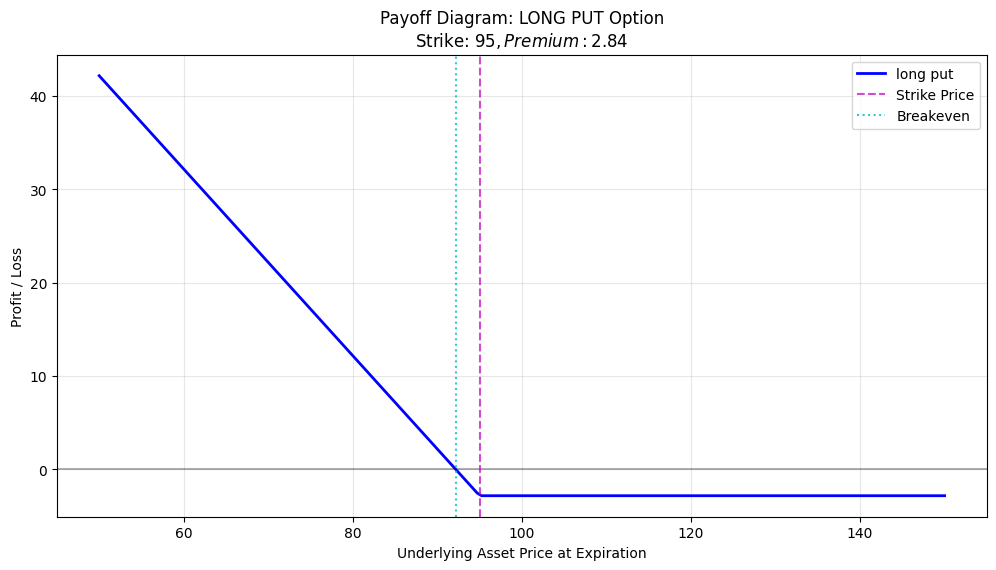


3. Straddle Strategy (Long Call + Long Put):


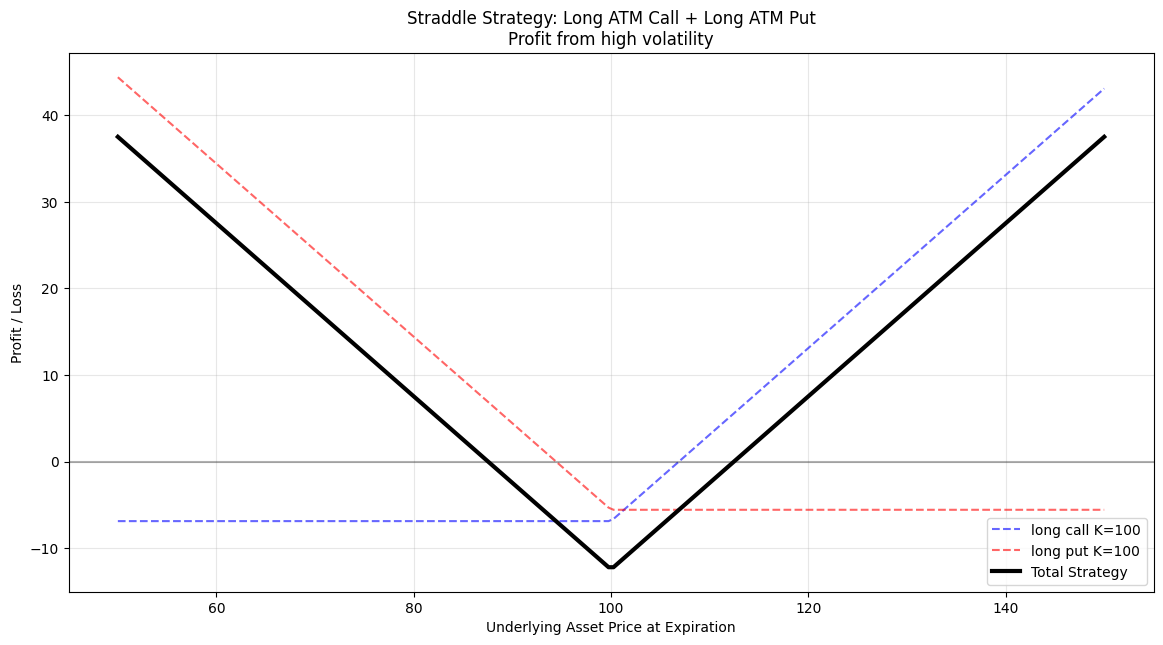


4. Bull Call Spread:


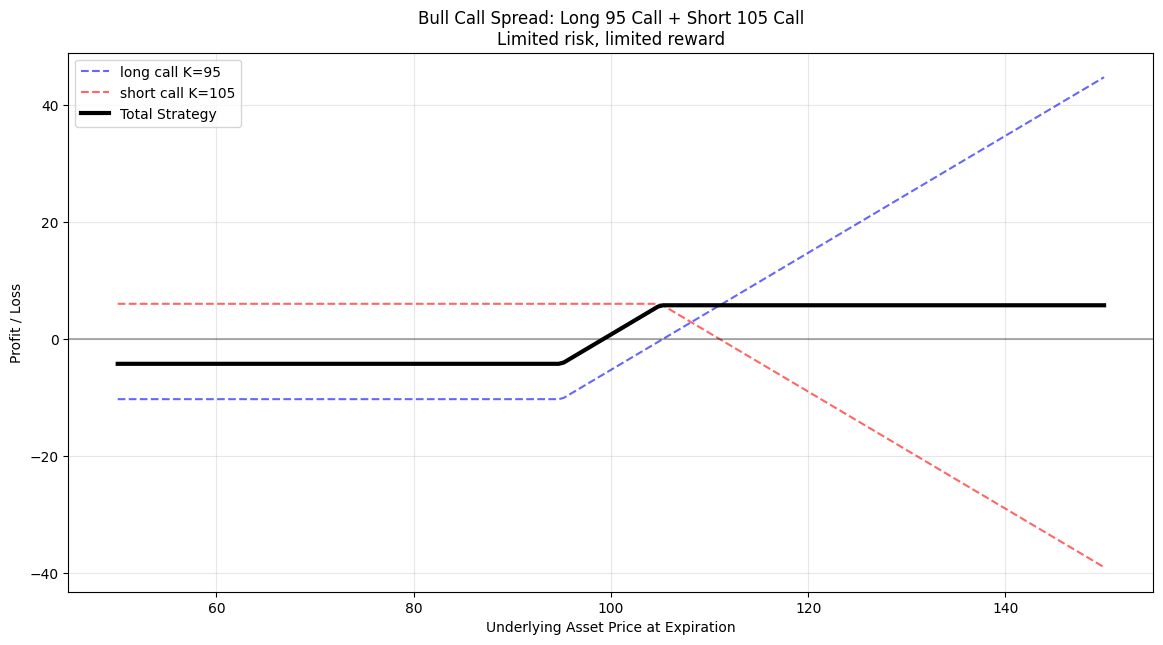


STRATEGY ANALYSIS:
Straddle - Max Profit: Unlimited
Straddle - Max Loss: $12.22
Bull Spread - Max Profit: $5.79
Bull Spread - Max Loss: $4.21


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

def black_scholes(S, K, T, r, sigma, option_type):
    """
    Calculate the Black-Scholes option price for European options.
    
    Parameters:
    ----------
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to expiration (in years)
    r : float
        Risk-free interest rate (decimal form, e.g., 0.03 for 3%)
    sigma : float
        Volatility of the underlying (decimal, e.g., 0.2 for 20%)
    option_type : str
        Either 'call' or 'put'
    """
    # Intermediate variables (standardized normal variables for BS formula)
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    # Return option price depending on type
    if option_type == 'call':
        return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


def calculate_payoff(asset_prices, option_type, strike, premium, position='long'):
    """
    Calculate the payoff profile of a single option at expiration.

    Parameters:
    ----------
    asset_prices : array-like
        Possible prices of the underlying at expiration
    option_type : str
        'call' or 'put'
    strike : float
        Strike price of the option
    premium : float
        Premium paid (long) or received (short) for the option
    position : str
        'long' (buy) or 'short' (sell)
    """
    if option_type == 'call':
        # Call option intrinsic value: max(0, S - K)
        intrinsic = np.maximum(0, asset_prices - strike)
    elif option_type == 'put':
        # Put option intrinsic value: max(0, K - S)
        intrinsic = np.maximum(0, strike - asset_prices)
    
    # Adjust payoff for premium and position
    if position == 'long':
        payoff = intrinsic - premium   # Long = intrinsic - cost
    else:
        payoff = premium - intrinsic   # Short = premium received - intrinsic
    
    return payoff


def plot_single_option_payoff(S_range, strike, premium, option_type, position='long'):
    """
    Plot the payoff diagram of a single option at expiration.
    """
    # Compute payoffs across possible stock prices
    payoffs = calculate_payoff(S_range, option_type, strike, premium, position)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(S_range, payoffs, 'b-', linewidth=2, label=f'{position} {option_type}')
    
    # Add reference lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)  # x-axis (zero profit/loss)
    plt.axvline(x=strike, color='m', linestyle='--', alpha=0.7, label='Strike Price')
    
    # Mark breakeven for long positions
    if position == 'long':
        if option_type == 'call':
            breakeven = strike + premium
        else:  # long put
            breakeven = strike - premium
        plt.axvline(x=breakeven, color='c', linestyle=':', alpha=0.8, label='Breakeven')
    
    # Labels and title
    plt.xlabel('Underlying Asset Price at Expiration')
    plt.ylabel('Profit / Loss')
    plt.title(f'Payoff Diagram: {position.upper()} {option_type.upper()} Option\n'
              f'Strike: ${strike}, Premium: ${premium:.2f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return payoffs


def plot_strategy_payoff(strategies, S_range, title):
    """
    Plot the payoff diagram of a multi-leg options strategy.

    Parameters:
    ----------
    strategies : list of dicts
        Each dictionary describes one option leg with:
        {'type': 'call'/'put', 'strike': float, 'premium': float, 'position': 'long'/'short'}
    S_range : array-like
        Range of possible underlying prices
    title : str
        Title for the plot
    """
    total_payoff = np.zeros_like(S_range)  # Start with zero payoff
    
    plt.figure(figsize=(14, 7))
    
    # Process each leg of the strategy
    for i, strategy in enumerate(strategies):
        # Compute payoff for this leg
        leg_payoff = calculate_payoff(
            S_range, 
            strategy['type'], 
            strategy['strike'], 
            strategy['premium'], 
            strategy['position']
        )
        total_payoff += leg_payoff  # Add to total payoff
        
        # Plot individual leg (dashed line, different colors)
        colors = ['blue', 'red', 'green', 'orange', 'purple']
        plt.plot(S_range, leg_payoff, linestyle='--', alpha=0.6, 
                 color=colors[i % len(colors)], 
                 label=f"{strategy['position']} {strategy['type']} K={strategy['strike']}")
    
    # Plot total payoff (bold black line)
    plt.plot(S_range, total_payoff, 'k-', linewidth=3, label='Total Strategy')
    
    # Add reference lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Labels and title
    plt.xlabel('Underlying Asset Price at Expiration')
    plt.ylabel('Profit / Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return total_payoff


# Example usage and demonstration
if __name__ == "__main__":
    # Define possible underlying prices at expiration
    current_price = 100
    S_range = np.linspace(50, 150, 200)  # Prices between $50 and $150
    
    print("SINGLE OPTION PAYOFF DIAGRAMS")
    print("=" * 50)
    
    # Example 1: Long Call
    print("\n1. Long Call Option:")
    call_strike = 105
    call_premium = black_scholes(current_price, call_strike, 0.5, 0.03, 0.2, 'call')
    print(f"   Strike: ${call_strike}, Premium: ${call_premium:.2f}")
    plot_single_option_payoff(S_range, call_strike, call_premium, 'call', 'long')
    
    # Example 2: Long Put
    print("\n2. Long Put Option:")
    put_strike = 95
    put_premium = black_scholes(current_price, put_strike, 0.5, 0.03, 0.2, 'put')
    print(f"   Strike: ${put_strike}, Premium: ${put_premium:.2f}")
    plot_single_option_payoff(S_range, put_strike, put_premium, 'put', 'long')
    
    # Example 3: Straddle Strategy (Long Call + Long Put)
    print("\n3. Straddle Strategy (Long Call + Long Put):")
    straddle_strategies = [
        {'type': 'call', 'strike': 100, 'premium': 6.89, 'position': 'long'},
        {'type': 'put',  'strike': 100, 'premium': 5.58, 'position': 'long'}
    ]
    straddle_payoff = plot_strategy_payoff(
        straddle_strategies, 
        S_range, 
        'Straddle Strategy: Long ATM Call + Long ATM Put\nProfit from high volatility'
    )
    
    # Example 4: Bull Call Spread
    print("\n4. Bull Call Spread:")
    bull_spread_strategies = [
        {'type': 'call', 'strike': 95, 'premium': 10.25, 'position': 'long'},   # Buy lower strike call
        {'type': 'call', 'strike': 105, 'premium': 6.04, 'position': 'short'}   # Sell higher strike call
    ]
    bull_spread_payoff = plot_strategy_payoff(
        bull_spread_strategies,
        S_range,
        'Bull Call Spread: Long 95 Call + Short 105 Call\nLimited risk, limited reward'
    )
    
    # Print simple analysis of strategies
    print("\nSTRATEGY ANALYSIS:")
    print(f"Straddle - Max Profit: Unlimited")
    print(f"Straddle - Max Loss: ${-min(straddle_payoff):.2f}")
    print(f"Bull Spread - Max Profit: ${max(bull_spread_payoff):.2f}")
    print(f"Bull Spread - Max Loss: ${-min(bull_spread_payoff):.2f}")


---

<span style="font-size:2.2em; font-weight:bold; color:#2E86C1;">3.1 Trend-Following Strategy with Option Overlays</span>

Leveraging Market Momentum with Derivatives

A trend-following strategy using options overlays combines directional market views with the leverage and defined risk characteristics of options. This approach allows traders to capitalize on sustained price movements while managing risk exposure more effectively than outright stock positions.

Options overlays enhance traditional trend-following by providing non-linear payoff structures, limited downside risk, and the ability to profit from both momentum and volatility changes. This strategy is particularly powerful in trending markets where sustained price movements can generate significant returns through option leverage.

<span style="color:#E74C3C;font-weight:bold;">Core Concept:</span>
The strategy involves identifying established trends through technical indicators and then implementing option positions that benefit from continued momentum. This can include buying calls in uptrends, puts in downtrends, or using more complex structures like ratio spreads and backspreads to capitalize on accelerated moves.

<span style="color:#E74C3C;font-weight:bold;">Key Advantages:</span>

&nbsp;&nbsp;• **Leverage**: Options provide amplified exposure to price movements

&nbsp;&nbsp;• **Defined Risk**: Maximum loss is limited to premium paid for long options

&nbsp;&nbsp;• **Flexibility**: Can profit from various market conditions (directional, volatile, range-bound)

&nbsp;&nbsp;• **Tail Risk Management**: Ability to structure positions for specific risk-reward preferences

<span style="color:#E74C3C;font-weight:bold;">In this section we will implement a systematic trend-following strategy that uses moving average crossovers to generate signals and options overlays to execute directional views with controlled risk exposure.</span>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock price development from 2019-05-02 until 2024-12-30:
Stock initial price: $65.75
Stock final price:   $3.86
Stock total return: -94.13%
Initial Capital: $10,000.00
Final Capital: $5,291,746.52
Total Return: 52817.47%
Number of Trades: 46


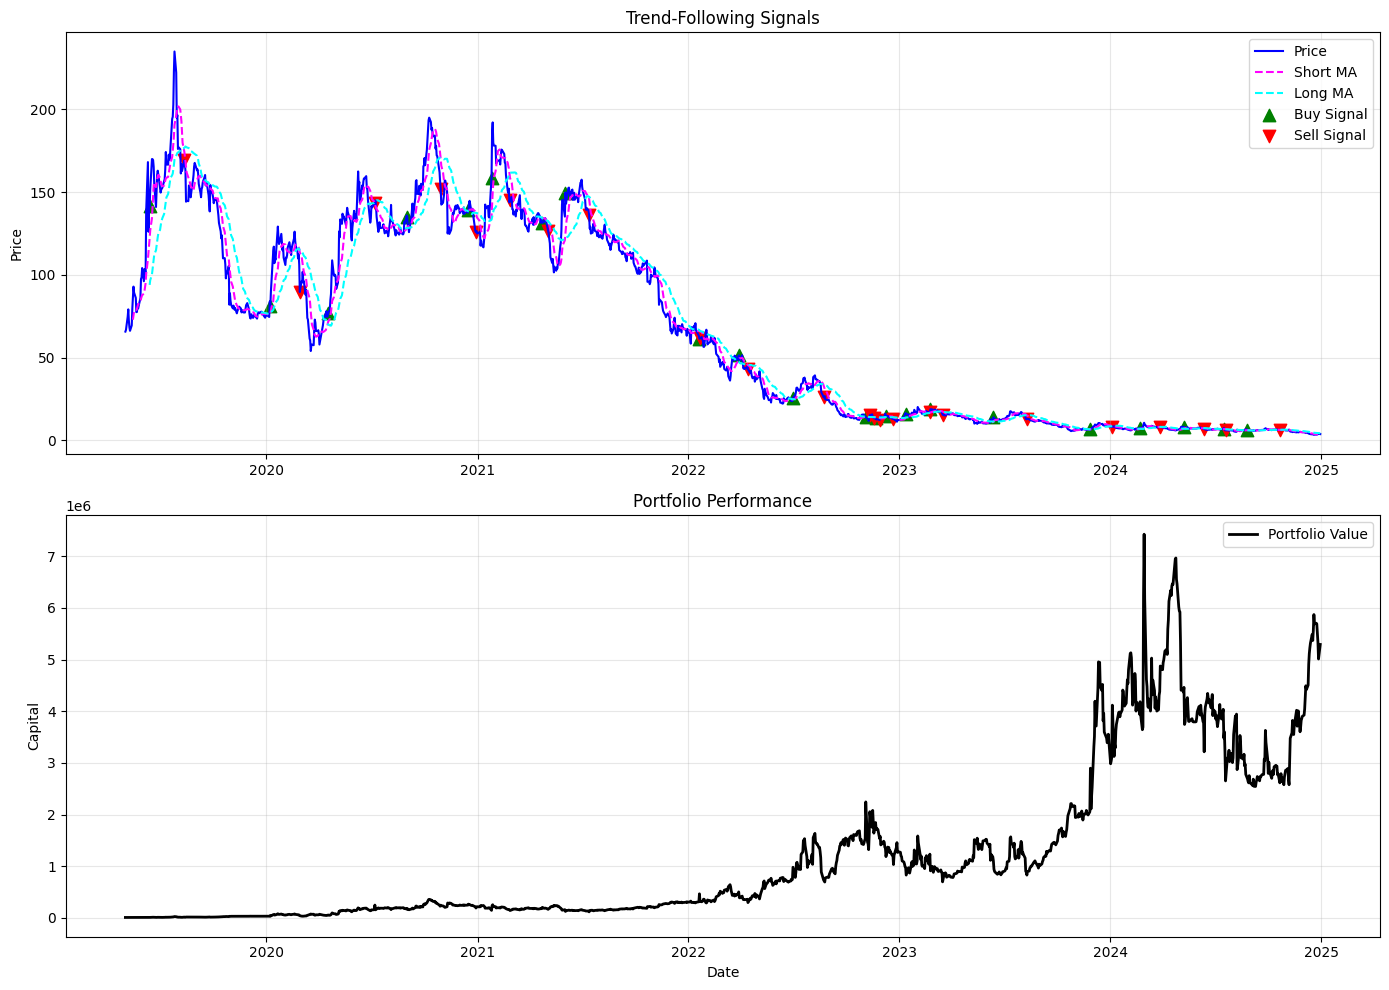

In [9]:
# =====================================
# Import required numerical libraries
# =====================================
import numpy as np
import pandas as pd
import math
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------
# Black-Scholes pricing function
# ------------------------------
def black_scholes(S, K, T, r, sigma, option_type):
    """
    Calculate the theoretical price of a European call or put option 
    using the Black-Scholes model.
    
    Parameters:
    S : float -> Current stock price
    K : float -> Strike price
    T : float -> Time to maturity (in years)
    r : float -> Risk-free interest rate
    sigma : float -> Volatility of the underlying asset
    option_type : str -> 'call' or 'put'
    
    Returns:
    float -> The option price
    """
    if T <= 0:  # If option already expired
        return max(0, (S - K) if option_type == 'call' else (K - S))
    
    # Standard Black-Scholes parameters
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    # Calculate option price depending on type
    if option_type == 'call':
        return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# ------------------------------
# Fetch Stock adjusted close prices
# ------------------------------
def get_stock_data(start="2019-01-01", end="2024-12-31"):
    """
    Fetch Stock (here placeholder BYND) historical adjusted closing prices 
    from Yahoo Finance. 
    
    Returns:
    Pandas Series with adjusted closing prices.
    """
    data = yf.download("BYND", start=start, end=end, auto_adjust=True)
    
    if data.empty:
        raise ValueError("Yahoo Finance returned no data. Check internet or date range.")
    
    # If Yahoo returns a MultiIndex, flatten it
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [' '.join(col).strip() for col in data.columns.values]
    
    # Use adjusted close prices (fallback if missing)
    if 'Close' in data.columns:
        prices = data['Close']
    else:
        prices = data.iloc[:,0]
    
    return pd.Series(prices, name='Close')

# Fetch Stock prices
stock_prices = get_stock_data()

# Compute simple total return for reference
start_price = stock_prices.iloc[0]
end_price = stock_prices.iloc[-1]
total_return = ((end_price - start_price) / start_price) * 100

print(f"Stock price development from {stock_prices.index[0].date()} until {stock_prices.index[-1].date()}:")
print(f"Stock initial price: ${start_price:.2f}")
print(f"Stock final price:   ${end_price:.2f}")
print(f"Stock total return: {total_return:+.2f}%")

# ------------------------------
# Calculate moving averages
# ------------------------------
def calculate_moving_averages(prices, short_window=10, long_window=50):
    """
    Calculate short-term and long-term moving averages.
    
    The moving averages are used to generate trading signals 
    (trend-following crossover strategy).
    """
    short_ma = prices.rolling(window=short_window).mean()
    long_ma = prices.rolling(window=long_window).mean()
    return short_ma, long_ma

# ------------------------------
# Generate trading signals
# ------------------------------
def generate_trading_signals(prices, short_ma, long_ma):
    """
    Generate buy (1) and sell (-1) signals using moving average crossovers.
    
    - Buy: when short MA crosses above long MA
    - Sell: when short MA crosses below long MA
    - No signal: otherwise
    
    Also filters out duplicate consecutive signals to avoid overtrading.
    """
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_ma'] = short_ma
    signals['long_ma'] = long_ma
    signals['signal'] = 0

    # Buy when short MA is above long MA
    signals.loc[short_ma > long_ma, 'signal'] = 1
    # Sell when short MA is below long MA
    signals.loc[short_ma < long_ma, 'signal'] = -1

    # Remove repeated signals (e.g. multiple consecutive 1s or -1s)
    signals['signal'] = signals['signal'].mask(signals['signal'].shift(1) == signals['signal'], 0)
    return signals

# ------------------------------
# Execute options strategy
# ------------------------------
def execute_options_strategy(signals, initial_capital=10000, r=0.02, sigma=0.5, days_to_expiry=30):
    """
    Execute a simplified trend-following options trading strategy:
    - Uses moving average signals to decide whether to buy calls (bullish) or puts (bearish).
    - Allocates 20% of available capital per trade.
    - Options are priced with Black-Scholes.
    
    Returns:
    trades : list of executed trades
    portfolio_values : list of portfolio values over time
    """
    cash = initial_capital
    position = 0           # 0=no position, 1=call, -1=put
    position_size = 0
    entry_price = 0
    trades = []
    portfolio_values = []

    for i in range(len(signals)):
        current_price = signals['price'].iloc[i]
        current_signal = signals['signal'].iloc[i]

        # If we hold an option, update its value
        if position != 0:
            T = days_to_expiry / 252  # assume 252 trading days per year
            option_value = black_scholes(
                S=current_price,
                K=entry_price,
                T=T,
                r=r,
                sigma=sigma,
                option_type='call' if position == 1 else 'put'
            ) * position_size
        else:
            option_value = 0

        # Close position if signal changes
        if position != 0 and current_signal != position and current_signal != 0:
            cash += option_value
            trades.append(('close', current_price, cash))
            position, position_size, entry_price = 0, 0, 0

        # Open new position if flat
        if position == 0 and current_signal != 0:
            position = current_signal
            entry_price = current_price
            capital_per_trade = cash * 0.2  # invest 20% of cash
            option_price = black_scholes(
                S=current_price,
                K=current_price,
                T=days_to_expiry / 252,
                r=r,
                sigma=sigma,
                option_type='call' if position == 1 else 'put'
            )
            position_size = int(capital_per_trade // option_price)
            cash -= position_size * option_price
            trades.append(('open', current_price, position_size, 'call' if position==1 else 'put'))

        # Track portfolio (cash + current option value)
        portfolio_values.append(cash + option_value)

    return trades, portfolio_values

# ------------------------------
# Plot results
# ------------------------------
def plot_trend_strategy(signals, portfolio_values):
    """
    Plot the trading signals along with the underlying price 
    and portfolio performance.
    """
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,10))

    # Upper plot: price and signals
    ax1.plot(signals.index, signals['price'], label='Price', color='blue')
    ax1.plot(signals.index, signals['short_ma'], '--', label='Short MA', color='magenta')
    ax1.plot(signals.index, signals['long_ma'], '--', label='Long MA', color='cyan')
    
    # Mark buy/sell signals
    ax1.scatter(signals.index[signals['signal']==1], signals['price'][signals['signal']==1],
                marker='^', color='green', label='Buy Signal', s=80)
    ax1.scatter(signals.index[signals['signal']==-1], signals['price'][signals['signal']==-1],
                marker='v', color='red', label='Sell Signal', s=80)

    ax1.set_title("Trend-Following Signals")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Lower plot: portfolio value
    ax2.plot(signals.index, portfolio_values, color='black', label='Portfolio Value', linewidth=2)
    ax2.set_title("Portfolio Performance")
    ax2.set_ylabel("Capital")
    ax2.set_xlabel("Date")
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ------------------------------
# Main execution script
# ------------------------------
if __name__ == "__main__":
    # 1️⃣ Fetch historical stock prices
    prices = get_stock_data()

    # 2️⃣ Compute moving averages
    short_ma, long_ma = calculate_moving_averages(prices, short_window=10, long_window=30)

    # 3️⃣ Generate trading signals
    signals = generate_trading_signals(prices, short_ma, long_ma)

    # 4️⃣ Run options trading strategy
    trades, portfolio_values = execute_options_strategy(signals)

    # 5️⃣ Print summary results
    initial_capital = 10000
    final_capital = portfolio_values[-1]
    total_return = (final_capital - initial_capital)/initial_capital*100
    print(f"Initial Capital: ${initial_capital:,.2f}")
    print(f"Final Capital: ${final_capital:,.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Number of Trades: {len([t for t in trades if t[0]=='open'])}")

    # 6️⃣ Plot strategy results
    plot_trend_strategy(signals, portfolio_values)


---

<span style="font-size:2.2em; font-weight:bold; color:#2E86C1;">3.2 Trend-Following Strategy with Option Overlays (adjusted)</span>

These adjustments address some of the unrealistic assumptions in the simple Black-Scholes version. By incorporating American option pricing, rolling volatility, time decay, and realistic contract sizing, the strategy better reflects how option trading works in practice, while still remaining tractable for demonstration purposes.

<span style="color:#E74C3C;font-weight:bold;">Key Changes:</span>

&nbsp;&nbsp;• **Option Pricing Model**: Binomial Tree (Cox-Ross-Rubinstein) -> allows ***American options*** with early exercise 

&nbsp;&nbsp;• **Volatility Treatment**: Dynamic rolling volatility (30-day historical volatility, updated daily)

&nbsp;&nbsp;• **Time to Expiry**: Daily decreasing time to expiry ***(days_remaining*)*** incorporated in option pricing

&nbsp;&nbsp;• **Contract Size**: Introduced contract multiplier (100 shares per option) -> more realistic cash flows

&nbsp;&nbsp;• **Position Management**: Checks if calculated position size ≥ 1 contract; skips trade otherwise

&nbsp;&nbsp;• **Bid-Ask Slippage & Commision**: entry uses ask (plus slippage & commission) and exits use bid -> more realistic

&nbsp;&nbsp;• **Dividend Yield (q) in Pricing**: continuous dividend yield added to the binomial tree -> was bedeutet das???

&nbsp;&nbsp;• **Stop-Loss / Take-Profit**: per-trade exit rules (e.g., −20% / +30%) are applied to the actual money invested (entry cost incl. fees), giving meaningful risk control









[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/var/folders/wp/mc5932px1ts2tsrgq5dn3rq00000gn/T/ipykernel_23226/2739518227.py:207: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_sigma = rolling_sigma.fillna(method='bfill').reindex(signals.index, method='ffill')



Stock price development from 2022-01-03 until 2024-12-30:
Stock initial price: $453.21
Stock final price:   $583.11
Stock total return: +28.66%

Strategy Performance: 
Initial Capital: $10,000.00
Final Capital: $14,699.83
Total Return: 47.00%
Number of Trades: 9
Stop Loss Exits: 3
Take Profit Exits: 6


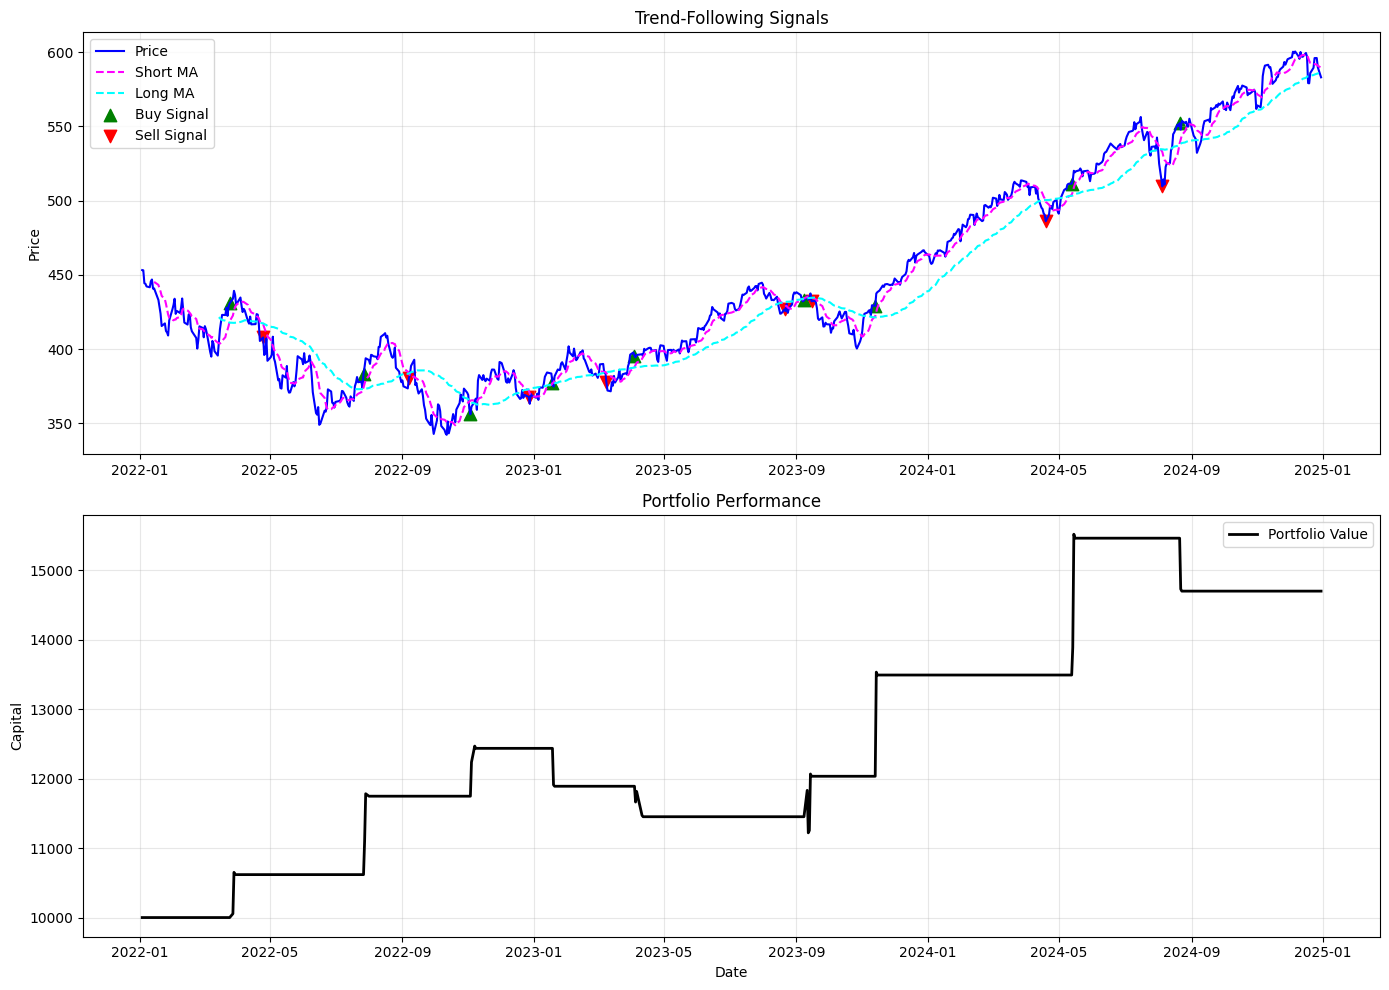

In [10]:
# ==========================================================
# Numerical libraries
# ==========================================================
import numpy as np
import pandas as pd
import math
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


# ==========================================================
# American Option Pricing via Binomial Tree (CRR model)
# ==========================================================
def american_option_price(S, K, T, r, sigma, option_type='call', steps=50, q=0.0):
    """
    Price an American option using the Cox-Ross-Rubinstein (CRR) binomial tree.
    Supports continuous dividend yield.

    Parameters
    ----------
    S : float / Current underlying stock price
    K : float / Strike price
    T : float / Time to expiry in years
    r : float / Risk-free interest rate (annual, continuous compounding)
    sigma : float / Annualized volatility of the stock
    option_type : str / 'call' or 'put'
    steps : int / Number of steps in the binomial tree
    q : float / Continuous dividend yield (annualized)
    """

    # ✅ Handle immediate expiry — option value is simply intrinsic value
    if T <= 0:
        return max(0.0, (S - K) if option_type == 'call' else (K - S))

    # ✅ Ensure steps >= 1
    steps = max(int(steps), 1)

    # ✅ Length of one step (in years)
    dt = float(T) / steps

    # ✅ Up and down movement multipliers
    u = np.exp(sigma * np.sqrt(dt))   # price goes up
    d = 1.0 / u                       # price goes down

    # ✅ Risk-neutral probability (adjusted for dividend yield q)
    p = (np.exp((r - q) * dt) - d) / (u - d)
    # Clamp between 0 and 1 for numerical stability
    p = float(min(max(p, 0.0), 1.0))

    # ✅ Compute terminal stock prices after all steps
    ST = np.array([S * (u ** j) * (d ** (steps - j)) for j in range(steps + 1)])

    # ✅ Compute terminal option payoffs
    if option_type == 'call':
        option_values = np.maximum(ST - K, 0.0)
    else:
        option_values = np.maximum(K - ST, 0.0)

    # ✅ Discount factor per step
    disc = np.exp(-r * dt)

    # ✅ Backward induction: roll option values back to present
    for i in range(steps - 1, -1, -1):
        # Expected option value discounted back
        option_values = disc * (p * option_values[1:i+2] + (1 - p) * option_values[0:i+1])

        # Recompute stock prices at this step
        ST = ST[0:i+1] / u

        # ✅ Early exercise feature (American option vs. European)
        if option_type == 'call':
            option_values = np.maximum(option_values, ST - K)
        else:
            option_values = np.maximum(option_values, K - ST)

    # ✅ Return the option price at the root of the tree
    return float(option_values[0])


# ==========================================================
# Fetch Adjusted Close Prices from Yahoo Finance
# ==========================================================
def get_nvidia_data(start="2022-01-01", end="2024-12-31"):
    """
    Fetch SPY ETF (S&P 500 proxy) historical adjusted closing prices
    from Yahoo Finance.

    Returns
    -------
    Pandas Series with 'Close' prices.
    """
    data = yf.download("SPY", start=start, end=end, auto_adjust=True)
    
    if data.empty:
        raise ValueError("Yahoo Finance returned no data. Check internet or date range.")
    
    # ✅ Handle MultiIndex (sometimes happens with yfinance)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [' '.join(col).strip() for col in data.columns.values]
    
    # ✅ Prefer 'Close' column if available
    if 'Close' in data.columns:
        prices = data['Close']
    else:
        prices = data.iloc[:, 0]   # fallback

    return pd.Series(prices, name='Close')


# ==========================================================
# Example: Calculate total return of stock
# ==========================================================
nvidia_prices = get_nvidia_data()

start_price = nvidia_prices.iloc[0]
end_price = nvidia_prices.iloc[-1]
total_return = ((end_price - start_price) / start_price) * 100

print(f"\nStock price development from {nvidia_prices.index[0].date()} until {nvidia_prices.index[-1].date()}:")
print(f"Stock initial price: ${start_price:.2f}")
print(f"Stock final price:   ${end_price:.2f}")
print(f"Stock total return: {total_return:+.2f}%")


# ==========================================================
# Moving Averages for Trend Detection
# ==========================================================
def calculate_moving_averages(prices, short_window=10, long_window=20):
    """
    Calculate short-term and long-term moving averages.

    Short MA reacts faster to price changes,
    Long MA smooths out noise for trend detection.
    """
    short_ma = prices.rolling(window=short_window).mean()
    long_ma = prices.rolling(window=long_window).mean()
    return short_ma, long_ma


# ==========================================================
# Generate Trading Signals (MA crossover strategy)
# ==========================================================
def generate_trading_signals(prices, short_ma, long_ma):
    """
    Generate buy (+1) and sell (-1) signals when moving averages cross.

    - Buy when short MA crosses above long MA (bullish)
    - Sell when short MA crosses below long MA (bearish)
    """
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_ma'] = short_ma
    signals['long_ma'] = long_ma
    signals['signal'] = 0

    # Detect crossovers
    buy_signals = (short_ma > long_ma) & (short_ma.shift(1) <= long_ma.shift(1))
    sell_signals = (short_ma < long_ma) & (short_ma.shift(1) >= long_ma.shift(1))
    
    signals.loc[buy_signals, 'signal'] = 1
    signals.loc[sell_signals, 'signal'] = -1
    
    return signals


# ==========================================================
# Execute Options Trading Strategy
# ==========================================================
def execute_options_strategy(signals,
                             initial_capital=10000,
                             r=0.02,
                             days_to_expiry=14,
                             commission_per_contract=0.65,
                             proportional_slippage=0.002,
                             bid_ask_spread=0.02,
                             min_sigma=0.05,
                             max_sigma=1.0,
                             dividend_yield=0.017,
                             contract_multiplier=100,
                             capital_share=0.2,
                             steps_tree=40,
                             verbose=False):
    """
    Execute a trend-following options strategy using American options.

    Enhancements vs. a simple strategy:
    - Includes bid/ask spread
    - Commissions and slippage costs
    - Uses rolling volatility (sigma) clamped to a range
    - Allows stop-loss and take-profit exits
    - Uses a binomial tree (American options)
    """
    cash = float(initial_capital)   # Available cash
    position = 0                    # 1=long call, -1=long put, 0=flat
    position_size = 0               # Number of option contracts
    entry_price = 0.0               # Entry spot price
    expiry_date = None              # Expiry date of current option
    entry_total_cost = 0.0          # Cost at entry (incl. fees)

    trades = []                     # Record of trades
    portfolio_values = []           # Daily portfolio values

    # Rolling volatility estimate (30-day annualized standard deviation of returns)
    returns = signals['price'].pct_change()
    rolling_sigma = returns.rolling(window=30).std() * np.sqrt(252)
    rolling_sigma = rolling_sigma.fillna(method='bfill').reindex(signals.index, method='ffill')

    # Cache to avoid recomputing binomial prices repeatedly
    price_cache = {}

    for i in range(len(signals)):
        current_date = signals.index[i]
        current_price = float(signals['price'].iloc[i])
        current_signal = int(signals['signal'].iloc[i])

        # Estimate volatility for current day
        sigma = float(np.clip(rolling_sigma.iloc[i] if i < len(rolling_sigma) else 0.2,
                              min_sigma, max_sigma))

        # === If position is open, compute option value ===
        if position != 0:
            days_remaining = max((expiry_date - current_date).days, 1)
            T = days_remaining / 252.0

            key = (round(current_price, 3), round(entry_price, 3), round(T, 4), round(sigma, 4), position)
            if key in price_cache:
                mid_per_share = price_cache[key]
            else:
                mid_per_share = american_option_price(
                    S=current_price, K=entry_price, T=T, r=r,
                    sigma=sigma, option_type='call' if position == 1 else 'put',
                    steps=steps_tree, q=dividend_yield
                )
                price_cache[key] = mid_per_share

            option_value = mid_per_share * contract_multiplier * position_size
        else:
            option_value = 0.0

        portfolio_values.append(cash + option_value)

        # === Stop-loss / take-profit exits ===
        if position != 0 and entry_total_cost > 0:
            current_mid = mid_per_share
            current_bid_per_contract = current_mid * (1 - bid_ask_spread / 2) * contract_multiplier
            current_slippage = current_bid_per_contract * proportional_slippage
            proceeds_if_sell = (current_bid_per_contract - current_slippage - commission_per_contract) * position_size
            pnl_percent = (proceeds_if_sell - entry_total_cost) / entry_total_cost

            if pnl_percent <= -0.20:   # Stop-loss at -20%
                cash += proceeds_if_sell
                trades.append(('stop_loss', current_date, current_price, position_size, proceeds_if_sell, pnl_percent))
                position, position_size, entry_price, expiry_date, entry_total_cost = 0, 0, 0.0, None, 0.0
                continue

            if pnl_percent >= 0.30:   # Take-profit at +30%
                cash += proceeds_if_sell
                trades.append(('take_profit', current_date, current_price, position_size, proceeds_if_sell, pnl_percent))
                position, position_size, entry_price, expiry_date, entry_total_cost = 0, 0, 0.0, None, 0.0
                continue

        # === Close position if opposite signal detected ===
        if position != 0 and current_signal != position and current_signal != 0:
            current_bid_per_contract = current_mid * (1 - bid_ask_spread / 2) * contract_multiplier
            current_slippage = current_bid_per_contract * proportional_slippage
            proceeds_if_sell = (current_bid_per_contract - current_slippage - commission_per_contract) * position_size
            cash += proceeds_if_sell
            trades.append(('close', current_date, current_price, position_size, proceeds_if_sell))
            position, position_size, entry_price, expiry_date, entry_total_cost = 0, 0, 0.0, None, 0.0

        # === Open new position if flat and new signal appears ===
        if position == 0 and current_signal != 0:
            position = current_signal
            entry_price = current_price
            expiry_date = current_date + pd.Timedelta(days=days_to_expiry)
            capital_per_trade = cash * capital_share

            # Compute entry option mid price
            T_entry = days_to_expiry / 252.0
            key_entry = (round(current_price, 3), round(entry_price, 3), round(T_entry, 4), round(sigma, 4), position)
            if key_entry in price_cache:
                mid_entry = price_cache[key_entry]
            else:
                mid_entry = american_option_price(
                    S=current_price, K=current_price, T=T_entry, r=r,
                    sigma=sigma, option_type='call' if position == 1 else 'put',
                    steps=steps_tree, q=dividend_yield
                )
                price_cache[key_entry] = mid_entry

            ask_entry_per_contract = mid_entry * (1 + bid_ask_spread / 2) * contract_multiplier
            slippage_cost_per_contract = ask_entry_per_contract * proportional_slippage
            total_cost_per_contract = ask_entry_per_contract + slippage_cost_per_contract + commission_per_contract

            position_size = int(capital_per_trade // total_cost_per_contract)

            if position_size == 0:
                # Not enough cash to buy a contract
                position = 0
                continue

            total_buy_cost = total_cost_per_contract * position_size
            cash -= total_buy_cost
            entry_total_cost = total_buy_cost
            trades.append(('open', current_date, current_price, position_size, total_buy_cost))

            if verbose:
                print(f"OPEN {current_date.date()} pos={position} size={position_size} price={current_price:.2f} total_cost={total_buy_cost:.2f} cash={cash:.2f}")

    return trades, portfolio_values


# ==========================================================
# Plotting Function
# ==========================================================
def plot_trend_strategy(signals, portfolio_values):
    """
    Plot the stock price with trading signals, and portfolio performance.
    """
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,10))

    # Plot stock + moving averages
    ax1.plot(signals.index, signals['price'], label='Price', color='blue')
    ax1.plot(signals.index, signals['short_ma'], '--', label='Short MA', color='magenta')
    ax1.plot(signals.index, signals['long_ma'], '--', label='Long MA', color='cyan')
    
    # Mark buy and sell signals
    ax1.scatter(signals.index[signals['signal']==1], signals['price'][signals['signal']==1],
                marker='^', color='green', label='Buy Signal', s=80)
    ax1.scatter(signals.index[signals['signal']==-1], signals['price'][signals['signal']==-1],
                marker='v', color='red', label='Sell Signal', s=80)

    ax1.set_title("Trend-Following Signals")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot portfolio value
    ax2.plot(signals.index, portfolio_values, color='black', label='Portfolio Value', linewidth=2)
    ax2.set_title("Portfolio Performance")
    ax2.set_ylabel("Capital")
    ax2.set_xlabel("Date")
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# ==========================================================
# Main execution
# ==========================================================
if __name__ == "__main__":
    # 1️⃣ Fetch historical prices
    prices = get_nvidia_data()

    # 2️⃣ Compute moving averages
    short_ma, long_ma = calculate_moving_averages(prices, short_window=10, long_window=50)

    # 3️⃣ Generate trading signals
    signals = generate_trading_signals(prices, short_ma, long_ma)

    # 4️⃣ Run options trading strategy
    trades, portfolio_values = execute_options_strategy(signals)

    # 5️⃣ Print performance summary
    initial_capital = 10000
    final_capital = portfolio_values[-1]
    total_return = (final_capital - initial_capital)/initial_capital*100
    print(f"\nStrategy Performance: \nInitial Capital: ${initial_capital:,.2f}")
    print(f"Final Capital: ${final_capital:,.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Number of Trades: {len([t for t in trades if t[0]=='open'])}")

    # Print stop loss / take profit exits
    stop_losses = [t for t in trades if t[0] == 'stop_loss']
    take_profits = [t for t in trades if t[0] == 'take_profit']
    print(f"Stop Loss Exits: {len(stop_losses)}")
    print(f"Take Profit Exits: {len(take_profits)}")

    # 6️⃣ Plot results
    plot_trend_strategy(signals, portfolio_values)


---

<span style="font-size:1.7em; font-weight:bold; color:#2E86C1;">Next Steps – Prospects of the Strategy</span>

Based on our work so far, we see potential to <span style="color:#E74C3C;font-weight:bold;">develop the strategy further</span>.  
The goal is to move from a simplified backtest towards a framework that is both <span style="color:#E74C3C;font-weight:bold;">more realistic</span> and <span style="color:#E74C3C;font-weight:bold;">more robust</span> in practice.  

The idea is not only to fine-tune the trading rules, but also to improve the <span style="color:#E74C3C;font-weight:bold;">data, assumptions, and risk management</span> behind them.  

We will implement this as follows:  

<span style="color:#E74C3C;font-weight:bold;">1. </span>**Data Quality**: move beyond historical prices and include implied volatility, dividends, and transaction costs.  

<span style="color:#E74C3C;font-weight:bold;">2. </span>**Risk Management**: test alternative stop-loss / take-profit rules and add portfolio-level risk controls.  

<span style="color:#E74C3C;font-weight:bold;">3. </span>**Trading Horizon**: compare short-dated vs. longer-dated options to balance cost of carry and time decay.  

<span style="color:#E74C3C;font-weight:bold;">4. </span>**Diversification**: extend from a single underlying to multiple assets or sectors to smooth performance.  

<span style="color:#E74C3C;font-weight:bold;">5. </span>**Robustness Tests**: run out-of-sample validation and stress tests under different market regimes.  


![HFC-M_BG.png](attachment:75792b09-e9ff-431b-b62e-468315154eff.png)